In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the CSV with full path (update this path if needed)
try:
    credit_card_data = pd.read_csv(
        "../creditcard.csv"
    )
    print("✅ Data loaded successfully!")
except FileNotFoundError:
    print("❌ creditcard.csv not found. Please check the file path.")

✅ Data loaded successfully!


In [3]:
# Basic Info Check
print("\n🔍 Dataset Summary:")
print(credit_card_data.info())


🔍 Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  flo

In [4]:
# Handle missing values (optional - dataset usually doesn't have any, but it's safe)
if credit_card_data.isnull().sum().sum() > 0:
    print("⚠️ Missing values found! Filling with forward fill.")
    credit_card_data.fillna(method="ffill", inplace=True)

C:\Users\kevin\AppData\Local\Temp\ipykernel_20104\1787694738.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=credit_card_data, palette="Set2")


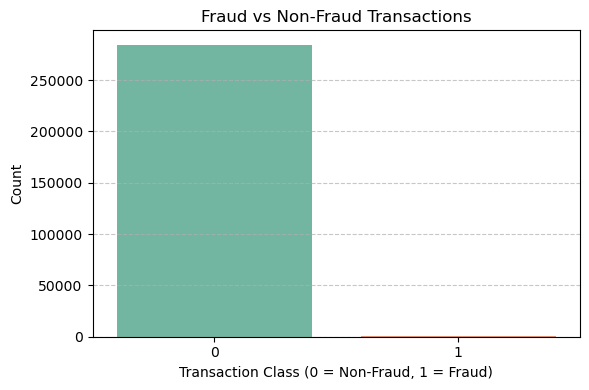

In [5]:
# Visualize class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x="Class", data=credit_card_data, palette="Set2")
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Transaction Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [6]:
# Correlation heatmap (zoomed into top correlations)
plt.figure(figsize=(20, 12))
corr = credit_card_data.corr()

<Figure size 2000x1200 with 0 Axes>

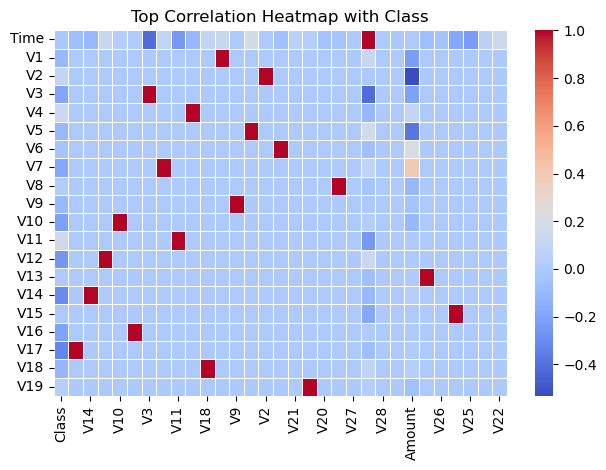

In [7]:
# Sort correlations with respect to 'Class'
sorted_corr = corr["Class"].abs().sort_values(ascending=False)

sns.heatmap(corr[sorted_corr.index][:20], cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Top Correlation Heatmap with Class")
plt.tight_layout()
plt.show()